In [1]:
import numpy as np
import pandas as pd

In [2]:
rawdata = pd.read_csv('Data/raw_data.csv', index_col = 'Unnamed: 0')

In [3]:
rawdata['readmitted'].sum()

11114

In [4]:
new_feature = (pd.read_csv('Data/Returned_Feature.csv', header = None)).drop(0, axis = 1)

In [5]:
rawdata['admission_type_id'] = rawdata['admission_type_id'].apply(lambda x: 1 if x == 1 or x == 2 or x == 7 else(3 if x == 3 else 99))

In [6]:
# 1 Urgent slash Emergency slash Trauma Center
# 0 Elective
#-1 other 
rawdata['admission_type_id'] = rawdata['admission_type_id'].apply(lambda x: 1 if x == 1 else (0 if x == 3 else -1))

In [7]:
rawdata['readmitted'].sum()

11114

In [8]:
d_admission = pd.get_dummies(rawdata['admission_type_id'])

In [9]:
corr = rawdata.corr()

In [10]:
import seaborn as sns

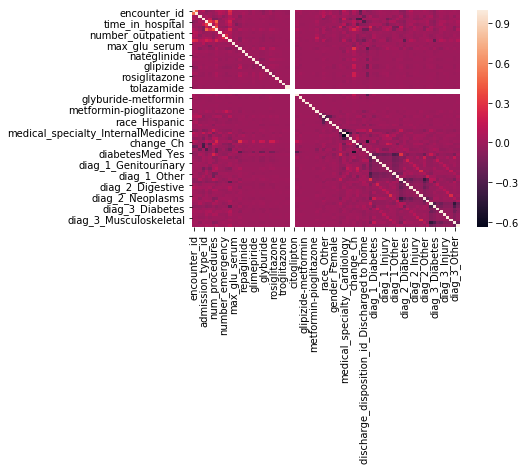

In [11]:
sns.heatmap(corr)

In [12]:
rawdata = rawdata.drop(['encounter_id'], axis = 1)
rawdata = rawdata.drop(['patient_nbr'], axis = 1)
rawdata = rawdata.drop(['admission_type_id'], axis = 1)
rawdata = rawdata.drop(['acetohexamide'], axis = 1) #Majority with the exception of one data point uses this
rawdata = rawdata.drop(['glimepiride-pioglitazone'], axis = 1) #Same as above
rawdata = rawdata.drop(['metformin-rosiglitazone'], axis = 1) #Same as above
rawdata = rawdata.drop(['metformin-pioglitazone'], axis = 1) #Same as above

#d_admission
rawdata['Admission_Emergency'] = d_admission[1]
rawdata['Admission_Elective'] = d_admission[0]


In [13]:
order = ['age', 'time_in_hospital', 'num_lab_procedures', 'num_procedures','max_glu_serum',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'number_diagnoses',  'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'race_AfricanAmerican',
       'race_Other', 'race_Hispanic', 'race_Asian', 'gender_Female',
       'gender_Unknown/Invalid', 'medical_specialty_InternalMedicine',
       'medical_specialty_Cardiology', 'medical_specialty_Surgery',
       'medical_specialty_Others', 'change_Ch',
       'admission_source_id_Admitted from emergency room',
       'admission_source_id_Others',
       'discharge_disposition_id_Discharged to home', 'diabetesMed_Yes',
       'diag_1_Circulatory', 'diag_1_Diabetes', 'diag_1_Digestive',
       'diag_1_Genitourinary', 'diag_1_Injury', 'diag_1_Musculoskeletal',
       'diag_1_Neoplasms', 'diag_1_Other', 'diag_1_Respiratory',
       'diag_2_Circulatory', 'diag_2_Diabetes', 'diag_2_Digestive',
       'diag_2_Genitourinary', 'diag_2_Injury', 'diag_2_Musculoskeletal',
       'diag_2_Neoplasms', 'diag_2_Other', 'diag_2_Respiratory',
       'diag_3_Circulatory', 'diag_3_Diabetes', 'diag_3_Digestive',
       'diag_3_Genitourinary', 'diag_3_Injury', 'diag_3_Musculoskeletal',
       'diag_3_Neoplasms', 'diag_3_Other', 'diag_3_Respiratory', 'Admission_Emergency',
       'Admission_Elective', 'readmitted']

In [14]:
from sklearn import preprocessing

In [15]:
min_max_scaler = preprocessing.MinMaxScaler()

In [16]:
rawdata['readmitted'].sum()

11114

In [17]:
rawdata = rawdata[order]

In [18]:
rawdata['readmitted'].sum()

11114

In [19]:
d_age = pd.get_dummies(rawdata['age'])

In [20]:
#d_age

In [21]:
rawdata = rawdata.drop('age', axis = 1)


In [22]:
rawdata['readmitted'].sum()

11114

In [23]:
rawdata['Age_Group_2'] = d_age.iloc[:,1]
rawdata['Age_Group_3'] = d_age.iloc[:,2]

In [24]:
rawdata['readmitted'].sum()

11114

In [25]:
order_1 = ['time_in_hospital', 'num_lab_procedures', 'num_procedures', 'max_glu_serum',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'number_diagnoses', 'A1Cresult', 'metformin',
       'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride',
       'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'race_AfricanAmerican', 'race_Other',
       'race_Hispanic', 'race_Asian', 'gender_Female',
       'gender_Unknown/Invalid', 'medical_specialty_InternalMedicine',
       'medical_specialty_Cardiology', 'medical_specialty_Surgery',
       'medical_specialty_Others', 'change_Ch',
       'admission_source_id_Admitted from emergency room',
       'admission_source_id_Others',
       'discharge_disposition_id_Discharged to home', 'diabetesMed_Yes',
       'diag_1_Circulatory', 'diag_1_Diabetes', 'diag_1_Digestive',
       'diag_1_Genitourinary', 'diag_1_Injury', 'diag_1_Musculoskeletal',
       'diag_1_Neoplasms', 'diag_1_Other', 'diag_1_Respiratory',
       'diag_2_Circulatory', 'diag_2_Diabetes', 'diag_2_Digestive',
       'diag_2_Genitourinary', 'diag_2_Injury', 'diag_2_Musculoskeletal',
       'diag_2_Neoplasms', 'diag_2_Other', 'diag_2_Respiratory',
       'diag_3_Circulatory', 'diag_3_Diabetes', 'diag_3_Digestive',
       'diag_3_Genitourinary', 'diag_3_Injury', 'diag_3_Musculoskeletal',
       'diag_3_Neoplasms', 'diag_3_Other', 'diag_3_Respiratory',
       'Admission_Emergency', 'Admission_Elective',
       'Age_Group_2', 'Age_Group_3', 'readmitted']

In [26]:
rawdata = rawdata[order_1]

In [27]:
rawdata.columns

Index(['time_in_hospital', 'num_lab_procedures', 'num_procedures',
       'max_glu_serum', 'num_medications', 'number_outpatient',
       'number_emergency', 'number_inpatient', 'number_diagnoses', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone',
       'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide',
       'examide', 'citoglipton', 'insulin', 'glyburide-metformin',
       'glipizide-metformin', 'race_AfricanAmerican', 'race_Other',
       'race_Hispanic', 'race_Asian', 'gender_Female',
       'gender_Unknown/Invalid', 'medical_specialty_InternalMedicine',
       'medical_specialty_Cardiology', 'medical_specialty_Surgery',
       'medical_specialty_Others', 'change_Ch',
       'admission_source_id_Admitted from emergency room',
       'admission_source_id_Others',
       'discharge_disposition_id_Discharged to home', 'diabetesMed_Yes',
       'diag_1_Cir

In [28]:
rawdata['readmitted'].sum()

11114

In [29]:
corr_post = rawdata.corr()

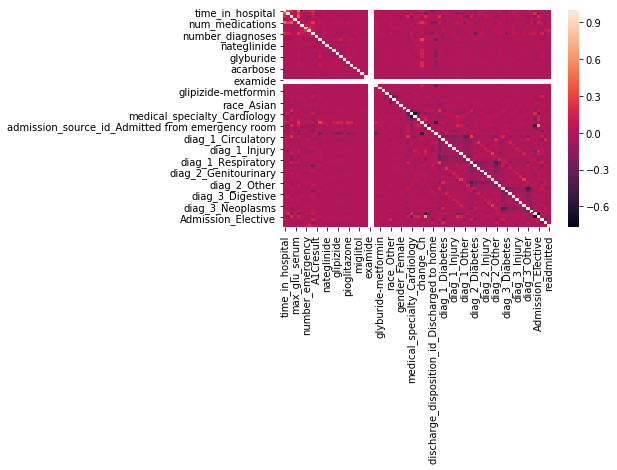

In [30]:
corr_post = rawdata.corr()
sns.heatmap(corr_post)

In [31]:
"""
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone'
       
"""

"\n       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',\n       'glimepiride', 'glipizide', 'glyburide', 'tolbutamide',\n       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',\n       'tolazamide', 'examide', 'citoglipton', 'insulin',\n       'glyburide-metformin', 'glipizide-metformin',\n       'glimepiride-pioglitazone', 'metformin-rosiglitazone',\n       'metformin-pioglitazone'\n       \n"

In [32]:
#None
#Norm
# > 7
# > 8
rawdata['A1C_result_norm'] = (pd.get_dummies(rawdata['A1Cresult'])).iloc[:,1]
rawdata['A1C_result_>7'] = (pd.get_dummies(rawdata['A1Cresult'])).iloc[:,2]
rawdata['A1C_result_>8'] = (pd.get_dummies(rawdata['A1Cresult'])).iloc[:,3]
rawdata = rawdata.drop('A1Cresult', axis = 1)

In [33]:
#None
#Norm
#> 200
# < 300
rawdata['max_glu_serum_Norm'] = (pd.get_dummies(rawdata['max_glu_serum'])).iloc[:,1]
rawdata['max_glu_serum_>7'] = (pd.get_dummies(rawdata['max_glu_serum'])).iloc[:,2]
rawdata['max_glu_serum_>8'] = (pd.get_dummies(rawdata['max_glu_serum'])).iloc[:,3]
rawdata = rawdata.drop('max_glu_serum', axis = 1)

In [34]:
list_of_things = ['metformin', 'repaglinide',
       'nateglinide',  'glimepiride', 'glipizide',
       'glyburide',  'pioglitazone', 'rosiglitazone', 
       'insulin',  
       ]

In [35]:
#List of things
#'chlorpropamide',
#'tolbutamide',
#'acarbose',
#'miglitol',
#'troglitazone', 'tolazamide',
# 'examide', 'citoglipton',
#'glyburide-metformin',
#'glipizide-metformin',

things_to_drop = ['chlorpropamide','tolbutamide','acarbose','miglitol','troglitazone', 'tolazamide'
                                  , 'examide', 'citoglipton', 'glyburide-metformin','glipizide-metformin'
                                  ]

In [36]:
for l in list_of_things:
    print(l)
    rawdata[l+'_No'] = (pd.get_dummies(rawdata[l])).iloc[:,1]
    rawdata[l+'_Down'] = (pd.get_dummies(rawdata[l])).iloc[:,2]
    rawdata[l+'_Steady'] = (pd.get_dummies(rawdata[l])).iloc[:,3]
    rawdata = rawdata.drop(labels = l, axis = 1)

metformin
repaglinide
nateglinide
glimepiride
glipizide
glyburide
pioglitazone
rosiglitazone
insulin


In [37]:
for d in things_to_drop:
    rawdata = rawdata.drop(labels = d, axis = 1)

In [38]:
rawdata['readmitted'].sum()

11114

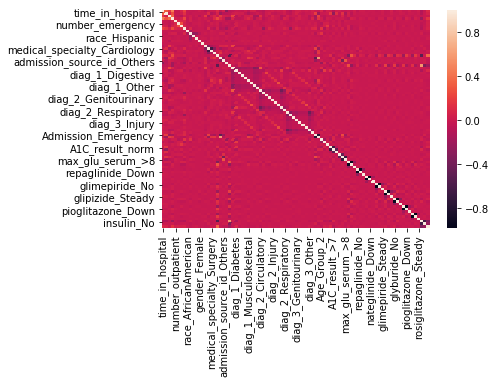

In [39]:
corr_post = rawdata.corr()
sns.heatmap(corr_post)

In [40]:
rawdata.columns

Index(['time_in_hospital', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'number_diagnoses', 'race_AfricanAmerican',
       'race_Other', 'race_Hispanic', 'race_Asian', 'gender_Female',
       'gender_Unknown/Invalid', 'medical_specialty_InternalMedicine',
       'medical_specialty_Cardiology', 'medical_specialty_Surgery',
       'medical_specialty_Others', 'change_Ch',
       'admission_source_id_Admitted from emergency room',
       'admission_source_id_Others',
       'discharge_disposition_id_Discharged to home', 'diabetesMed_Yes',
       'diag_1_Circulatory', 'diag_1_Diabetes', 'diag_1_Digestive',
       'diag_1_Genitourinary', 'diag_1_Injury', 'diag_1_Musculoskeletal',
       'diag_1_Neoplasms', 'diag_1_Other', 'diag_1_Respiratory',
       'diag_2_Circulatory', 'diag_2_Diabetes', 'diag_2_Digestive',
       'diag_2_Genitourinary', 'diag_2_Injury', 'diag_2_Musculoskeletal',
       'diag_2_Neopla

In [41]:
order_post = ['time_in_hospital', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'number_diagnoses', 'race_AfricanAmerican',
       'race_Other', 'race_Hispanic', 'race_Asian', 'gender_Female',
       'gender_Unknown/Invalid', 'medical_specialty_InternalMedicine',
       'medical_specialty_Cardiology', 'medical_specialty_Surgery',
       'medical_specialty_Others', 'change_Ch',
       'admission_source_id_Admitted from emergency room',
       'admission_source_id_Others',
       'discharge_disposition_id_Discharged to home', 'diabetesMed_Yes',
       'diag_1_Circulatory', 'diag_1_Diabetes', 'diag_1_Digestive',
       'diag_1_Genitourinary', 'diag_1_Injury', 'diag_1_Musculoskeletal',
       'diag_1_Neoplasms', 'diag_1_Other', 'diag_1_Respiratory',
       'diag_2_Circulatory', 'diag_2_Diabetes', 'diag_2_Digestive',
       'diag_2_Genitourinary', 'diag_2_Injury', 'diag_2_Musculoskeletal',
       'diag_2_Neoplasms', 'diag_2_Other', 'diag_2_Respiratory',
       'diag_3_Circulatory', 'diag_3_Diabetes', 'diag_3_Digestive',
       'diag_3_Genitourinary', 'diag_3_Injury', 'diag_3_Musculoskeletal',
       'diag_3_Neoplasms', 'diag_3_Other', 'diag_3_Respiratory',
       'Admission_Emergency', 'Admission_Elective', 'Age_Group_2',
       'Age_Group_3', 'A1C_result_norm', 'A1C_result_>7',
       'A1C_result_>8', 'max_glu_serum_Norm', 'max_glu_serum_>7',
       'max_glu_serum_>8', 'metformin_No', 'metformin_Down',
       'metformin_Steady', 'repaglinide_No', 'repaglinide_Down',
       'repaglinide_Steady', 'nateglinide_No', 'nateglinide_Down',
       'nateglinide_Steady', 'glimepiride_No', 'glimepiride_Down',
       'glimepiride_Steady', 'glipizide_No', 'glipizide_Down',
       'glipizide_Steady', 'glyburide_No', 'glyburide_Down',
       'glyburide_Steady', 'pioglitazone_No', 'pioglitazone_Down',
       'pioglitazone_Steady', 'rosiglitazone_No', 'rosiglitazone_Down',
       'rosiglitazone_Steady', 'insulin_No', 'insulin_Down', 'insulin_Steady',
       'readmitted']

In [42]:
rawdata = rawdata[order_post]

In [43]:
rawdata

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,race_AfricanAmerican,race_Other,...,pioglitazone_No,pioglitazone_Down,pioglitazone_Steady,rosiglitazone_No,rosiglitazone_Down,rosiglitazone_Steady,insulin_No,insulin_Down,insulin_Steady,readmitted
1,3,59,0,18,0,0,0,9,0,1,...,1,0,0,1,0,0,0,0,1,0
2,2,11,5,13,2,0,1,6,0,0,...,1,0,0,1,0,0,1,0,0,0
3,2,44,1,16,0,0,0,7,0,1,...,1,0,0,1,0,0,0,0,1,0
4,1,51,0,8,0,0,0,5,0,1,...,1,0,0,1,0,0,0,1,0,0
5,3,31,6,16,0,0,0,9,0,1,...,1,0,0,1,0,0,0,1,0,0
6,4,70,1,21,0,0,0,7,0,1,...,1,0,0,1,0,0,0,1,0,0
7,5,73,0,12,0,0,0,8,0,1,...,1,0,0,1,0,0,1,0,0,0
8,13,68,2,28,0,0,0,8,0,1,...,1,0,0,1,0,0,0,1,0,0
9,12,33,3,18,0,0,0,8,0,1,...,1,0,0,0,1,0,0,1,0,0
10,9,47,2,17,0,0,0,9,0,0,...,1,0,0,1,0,0,0,1,0,0


In [44]:
norm_data = min_max_scaler.fit_transform(rawdata)

In [45]:
norm_data = pd.DataFrame(norm_data)
norm_data.columns = order_post

In [46]:
norm_data = norm_data.drop('gender_Unknown/Invalid' ,axis = 1)

In [47]:
col = norm_data.columns 

In [48]:
norm_data['returning'] = new_feature

In [49]:
norm_data.columns

Index(['time_in_hospital', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'number_diagnoses', 'race_AfricanAmerican',
       'race_Other', 'race_Hispanic', 'race_Asian', 'gender_Female',
       'medical_specialty_InternalMedicine', 'medical_specialty_Cardiology',
       'medical_specialty_Surgery', 'medical_specialty_Others', 'change_Ch',
       'admission_source_id_Admitted from emergency room',
       'admission_source_id_Others',
       'discharge_disposition_id_Discharged to home', 'diabetesMed_Yes',
       'diag_1_Circulatory', 'diag_1_Diabetes', 'diag_1_Digestive',
       'diag_1_Genitourinary', 'diag_1_Injury', 'diag_1_Musculoskeletal',
       'diag_1_Neoplasms', 'diag_1_Other', 'diag_1_Respiratory',
       'diag_2_Circulatory', 'diag_2_Diabetes', 'diag_2_Digestive',
       'diag_2_Genitourinary', 'diag_2_Injury', 'diag_2_Musculoskeletal',
       'diag_2_Neoplasms', 'diag_2_Other', 'diag_2_Res

In [50]:
order_norm = ['time_in_hospital', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'number_diagnoses', 'race_AfricanAmerican',
       'race_Other', 'race_Hispanic', 'race_Asian', 'gender_Female',
       'medical_specialty_InternalMedicine', 'medical_specialty_Cardiology',
       'medical_specialty_Surgery', 'medical_specialty_Others', 'change_Ch',
       'admission_source_id_Admitted from emergency room',
       'admission_source_id_Others',
       'discharge_disposition_id_Discharged to home', 'diabetesMed_Yes',
       'diag_1_Circulatory', 'diag_1_Diabetes', 'diag_1_Digestive',
       'diag_1_Genitourinary', 'diag_1_Injury', 'diag_1_Musculoskeletal',
       'diag_1_Neoplasms', 'diag_1_Other', 'diag_1_Respiratory',
       'diag_2_Circulatory', 'diag_2_Diabetes', 'diag_2_Digestive',
       'diag_2_Genitourinary', 'diag_2_Injury', 'diag_2_Musculoskeletal',
       'diag_2_Neoplasms', 'diag_2_Other', 'diag_2_Respiratory',
       'diag_3_Circulatory', 'diag_3_Diabetes', 'diag_3_Digestive',
       'diag_3_Genitourinary', 'diag_3_Injury', 'diag_3_Musculoskeletal',
       'diag_3_Neoplasms', 'diag_3_Other', 'diag_3_Respiratory',
       'Admission_Emergency', 'Admission_Elective', 'Age_Group_2',
       'Age_Group_3', 'A1C_result_norm', 'A1C_result_>7', 'A1C_result_>8',
       'max_glu_serum_Norm', 'max_glu_serum_>7', 'max_glu_serum_>8',
       'metformin_No', 'metformin_Down', 'metformin_Steady', 'repaglinide_No',
       'repaglinide_Down', 'repaglinide_Steady', 'nateglinide_No',
       'nateglinide_Down', 'nateglinide_Steady', 'glimepiride_No',
       'glimepiride_Down', 'glimepiride_Steady', 'glipizide_No',
       'glipizide_Down', 'glipizide_Steady', 'glyburide_No', 'glyburide_Down',
       'glyburide_Steady', 'pioglitazone_No', 'pioglitazone_Down',
       'pioglitazone_Steady', 'rosiglitazone_No', 'rosiglitazone_Down',
       'rosiglitazone_Steady', 'insulin_No', 'insulin_Down', 'insulin_Steady','returning',
       'readmitted', ]

In [67]:
norm_data = norm_data[order_norm]

In [68]:
for i in col:
    print(norm_data[i]) 

0        0.153846
1        0.076923
2        0.076923
3        0.000000
4        0.153846
5        0.230769
6        0.307692
7        0.923077
8        0.846154
9        0.615385
10       0.461538
11       0.461538
12       0.692308
13       0.000000
14       0.846154
15       0.230769
16       0.153846
17       0.307692
18       0.384615
19       0.076923
20       0.076923
21       0.076923
22       0.769231
23       0.153846
24       0.000000
25       0.384615
26       0.076923
27       0.692308
28       0.307692
29       0.384615
           ...   
96836    0.384615
96837    0.538462
96838    0.230769
96839    0.000000
96840    0.000000
96841    0.000000
96842    0.230769
96843    0.230769
96844    0.000000
96845    0.153846
96846    0.230769
96847    0.538462
96848    1.000000
96849    0.153846
96850    0.153846
96851    0.923077
96852    0.153846
96853    0.923077
96854    0.615385
96855    1.000000
96856    0.076923
96857    0.307692
96858    0.307692
96859    0.000000
96860    0

In [69]:
norm_data.to_csv('Data/Cleaned.csv')

In [70]:
norm_data.shape

(96866, 88)

In [71]:
y = norm_data['readmitted']

In [72]:
x = norm_data.iloc[:,:87]

In [73]:
from sklearn.cross_validation import train_test_split

In [74]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

In [75]:
X_train['y'] = y_train

/home/jho9/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [76]:
X_test['y'] = y_test

/home/jho9/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [77]:
X_test.to_csv('Data/New_test_set.csv')

In [78]:
X_train.to_csv('Data/New_train_set.csv')

In [79]:
X_test['y'].sum()

2227.0

In [80]:
X_train['y'].sum()

8887.0

In [81]:
X_train['y'].sum() + X_test['y'].sum()

11114.0

In [83]:
X_train

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,race_AfricanAmerican,race_Other,...,pioglitazone_Down,pioglitazone_Steady,rosiglitazone_No,rosiglitazone_Down,rosiglitazone_Steady,insulin_No,insulin_Down,insulin_Steady,returning,y
25868,0.000000,0.106870,0.000000,0.0875,0.000000,0.000000,0.047619,0.461538,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
8964,0.076923,0.000000,0.500000,0.2000,0.000000,0.000000,0.095238,0.000000,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
44174,0.076923,0.221374,0.000000,0.1750,0.000000,0.000000,0.000000,0.461538,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
35727,0.153846,0.190840,0.166667,0.0875,0.000000,0.000000,0.000000,0.461538,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
72196,0.307692,0.503817,0.166667,0.1250,0.000000,0.013158,0.000000,0.307692,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
27693,0.230769,0.450382,0.000000,0.0625,0.000000,0.000000,0.000000,0.153846,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
63231,0.153846,0.450382,0.000000,0.2250,0.023810,0.039474,0.142857,0.461538,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5020,0.461538,0.427481,0.000000,0.1750,0.000000,0.000000,0.047619,0.307692,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
41506,0.076923,0.007634,0.000000,0.2125,0.000000,0.000000,0.047619,0.461538,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
94364,0.076923,0.442748,0.000000,0.0625,0.000000,0.013158,0.000000,0.461538,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [82]:
norm_data

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,race_AfricanAmerican,race_Other,...,pioglitazone_Down,pioglitazone_Steady,rosiglitazone_No,rosiglitazone_Down,rosiglitazone_Steady,insulin_No,insulin_Down,insulin_Steady,returning,readmitted
0,0.153846,0.442748,0.000000,0.2125,0.000000,0.000000,0.000000,0.461538,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.076923,0.076336,0.833333,0.1500,0.047619,0.000000,0.047619,0.230769,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.076923,0.328244,0.166667,0.1875,0.000000,0.000000,0.000000,0.307692,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.000000,0.381679,0.000000,0.0875,0.000000,0.000000,0.000000,0.153846,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.153846,0.229008,1.000000,0.1875,0.000000,0.000000,0.000000,0.461538,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5,0.230769,0.526718,0.166667,0.2500,0.000000,0.000000,0.000000,0.307692,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
6,0.307692,0.549618,0.000000,0.1375,0.000000,0.000000,0.000000,0.384615,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
7,0.923077,0.511450,0.333333,0.3375,0.000000,0.000000,0.000000,0.384615,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
8,0.846154,0.244275,0.500000,0.2125,0.000000,0.000000,0.000000,0.384615,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
9,0.615385,0.351145,0.333333,0.2000,0.000000,0.000000,0.000000,0.461538,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
